###This IPython Notebook is for showing spectra of sample VG09-12, on- and off- the mesh region with 49+/-6 nm gap.  This version is updated with new data from February 2015.

The filename of the figure is **[TBD].pdf**.

Author: Michael Gully-Santiago, `gully@astro.as.utexas.edu`

Date: February 9, 2015

In [1]:
%pylab inline
import emcee
import triangle
import pandas as pd
import seaborn as sns
from astroML.decorators import pickle_results

Populating the interactive namespace from numpy and matplotlib


In [2]:
sns.set_context("paper", font_scale=4.0, rc={"lines.linewidth": 2.5})
sns.set(style="ticks")

Import all the local models, saved locally as `etalon.py`.  See the paper for derivations of these equations.

In [3]:
from etalon import *
np.random.seed(78704)

Read in the data.  We want "VG09-12" from February 2015

In [4]:
df = pd.read_csv('../data/VG09_12_gap_20150206.csv', index_col=0)
df.head()

,VG09-12_1_0,VG09-12_1_2,VG09-12_1_4,VG09-12_1_6,VG09-12_1_8,VG09-12_1_10,VG09-12_1_12,VG09-12_1_14,VG09-12_1_16,VG09-12_1_18,...,VG09-12_1_32,VG09-12_1_34,VG09-12_1_36,VG09-12_1_38,VG09-12_1_40,VG09-12_1_42,VG09-12_1_44,VG09-12_1_46,VG09-12_1_48,VG09-12_1_50
wavelength,,,,,,,,,,,,,,,,,,,,,
1775,1.880152,1.641429,0.976230,0.964145,0.976460,0.979872,0.987270,0.986529,1.070819,1.002500,...,1.002960,1.002864,1.003209,1.003811,0.965806,0.918209,1.876167,1.881628,1.883350,1.883947
1765,1.879758,1.642331,0.974838,0.964183,0.976321,0.978982,0.986934,0.985437,1.070772,1.002522,...,1.002708,1.002673,1.003248,1.003872,0.966022,0.917161,1.875934,1.881610,1.883944,1.884051
1755,1.880479,1.643144,0.973691,0.964016,0.975474,0.978551,0.986437,0.984843,1.070936,1.002670,...,1.002381,1.002297,1.003009,1.003320,0.965691,0.917684,1.876912,1.882451,1.884022,1.884329
1745,1.880220,1.643559,0.973281,0.963117,0.974474,0.977558,0.986889,0.984795,1.070851,1.002239,...,1.002931,1.002059,1.002659,1.003579,0.965511,0.916989,1.876531,1.882771,1.884626,1.884169
1735,1.880693,1.643988,0.973618,0.963056,0.973207,0.976588,0.987083,0.984501,1.070377,1.001896,...,1.002166,1.002575,1.003052,1.003299,0.965231,0.917656,1.876819,1.882872,1.884520,1.884540


The step interval is 2.0 mm.  There are 26 steps.

In [5]:
# Introduce the Real data, decimate the data.
x = df.index.values
N = len(x)
# Define T_DSP for the model
T_DSP = T_gap_Si(x, 0.0)
n1 = sellmeier_Si(x)

# Define uncertainty
yerr = 0.0002*np.ones(N)
yerr[(x > 1350) & (x < 1420)] = 0.0005 #higher noise in this region
iid_cov = np.diag(yerr ** 2)

# Select the spectrum of interest
# Normalize the spectrum by measured DSP Si wafer.
y = df['VG09-12_1_14'].values

Plot the data.  This is the original plot.

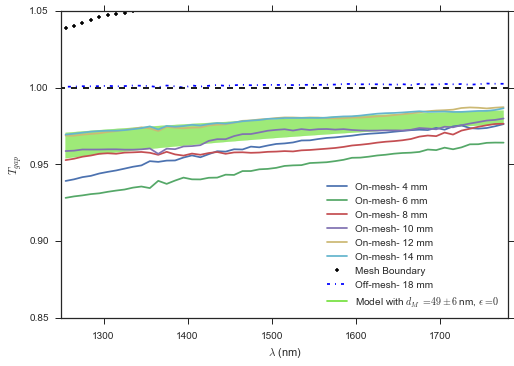

In [6]:
plt.plot(df.index, df['VG09-12_1_4'], label='On-mesh- 4 mm')
plt.plot(df.index, df['VG09-12_1_6'], label='On-mesh- 6 mm')
plt.plot(df.index, df['VG09-12_1_8'], label='On-mesh- 8 mm')
plt.plot(df.index, df['VG09-12_1_10'], label='On-mesh- 10 mm')
plt.plot(df.index, df['VG09-12_1_12'], label='On-mesh- 12 mm')
plt.plot(df.index, df['VG09-12_1_14'], label='On-mesh- 14 mm')
plt.plot(df.index, df['VG09-12_1_16'], 'k.', label='Mesh Boundary')
plt.plot(df.index, df['VG09-12_1_18'], 'b-.', label='Off-mesh- 18 mm')

fit1 = T_gap_Si_withFF_fast(x, 43, 0.5, n1)/T_DSP
fit2 = T_gap_Si_withFF_fast(x, 55, 0.5, n1)/T_DSP
fit2_label = 'Model with $d_M={:.0f}\pm{:.0f}$ nm, $\epsilon={:.0f}$'.format(49, 6, 0)
plt.fill_between(x, fit1, fit2, alpha=0.6, color=sns.xkcd_rgb["green apple"])
plt.plot([-10, -9], [-10, -9],"-", alpha=0.85, color=sns.xkcd_rgb["green apple"], label=fit2_label)

plt.plot([-1000, 9000], [1,1], 'k--')
plt.legend(loc='best')
plt.ylim(0.85, 1.05)
plt.xlim(1250, 1780)
plt.ylabel("$T_{gap}$")
plt.xlabel("$\lambda$ (nm)");
plt.savefig("VG0912_STA_scan.pdf",  bbox_inches='tight')

In [7]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.0})

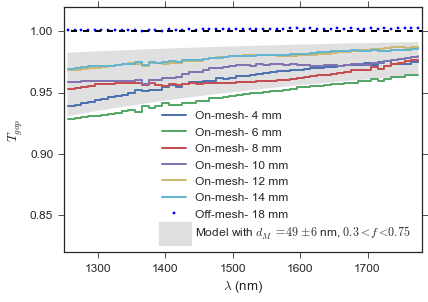

In [9]:
plt.step(df.index, df['VG09-12_1_4'], label='On-mesh- 4 mm')
plt.step(df.index, df['VG09-12_1_6'], label='On-mesh- 6 mm')
plt.step(df.index, df['VG09-12_1_8'], label='On-mesh- 8 mm')
plt.step(df.index, df['VG09-12_1_10'], label='On-mesh- 10 mm')
plt.step(df.index, df['VG09-12_1_12'], label='On-mesh- 12 mm')
plt.step(df.index, df['VG09-12_1_14'], label='On-mesh- 14 mm')
#plt.plot(df.index, df['VG09-12_1_16'], 'k.', label='Mesh Boundary')
plt.plot(df.index, df['VG09-12_1_18'], 'b.', label='Off-mesh- 18 mm')

fit1 = T_gap_Si_withFF_fast(x, 43, 0.3, n1)/T_DSP
fit2 = T_gap_Si_withFF_fast(x, 55, 0.75, n1)/T_DSP
fit2_label = 'Model with $d_M={:.0f}\pm{:.0f}$ nm, ${:.1f}<f<{:.2f}$'.format(49, 6, 0.30, 0.75)
plt.fill_between(x, fit1, fit2, alpha=0.6, color='#cccccc')
plt.plot([-10, -9], [-10, -9],"-", alpha=0.0, color='#cccccc', label=fit2_label)

plt.plot([-1000, 9000], [1,1], 'k--')
plt.legend(loc='best')
# Complete hack to get a shaded band in the legend.
plt.fill_between([1390, 1440], [0.825, 0.825], [0.845,0.845], alpha=0.6, color='#cccccc')
plt.ylim(0.82, 1.02)
plt.xlim(1250, 1780)
plt.ylabel("$T_{gap}$")
plt.xlabel("$\lambda$ (nm)");
plt.savefig("../figs/VG0912_STA_scan_coarse.pdf",  bbox_inches='tight')

Figure Caption:
===
Sample VG09-12 has a single coarse mesh.  The mesh is composed of boxes plasma-etched to a depth of $49\pm6\;$nm.   The boxes have an edge length of 1.5 mm.  The edges of adjacent boxes are spaced 0.62 mm apart, to yield an overall fill factor of 50%.  The Cary5000 measurement beam size is $\sim$1 mm $\times$ 10 mm.  Since the beam size is comparable to the mesh size, the fill factor at the position of the measurement will will differ from 50%. The slit measurement was aligned with the mesh grid.  The highest fill factor acheivable is about 75%, assuming the slit fit perfectly within a column of boxes.  The slit is larger than 0.62 mm, so the measurement cannot exhibit a 0% fill factor of voids.  The precise value of the minimum fill factor depends on the details of the slit width, which is not known precisely.  We assume that a minimum fill factor of 30%, but caution that this boundary is fuzzy.  

The end.